In [64]:
import pandas as pd
covid_data=pd.read_csv(r"Y:\machine leaning\project data\CovidDeaths.csv")


In [2]:
del data

NameError: name 'data' is not defined

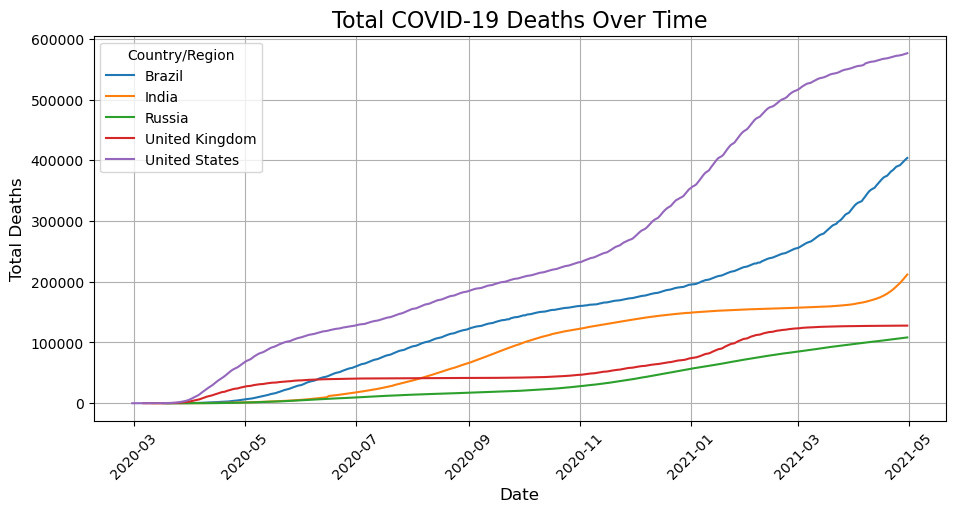

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime for easier plotting
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Filter data to focus on countries/regions with significant data
covid_data_filtered = covid_data.dropna(subset=['total_deaths', 'new_deaths'])

# Select a few countries for clearer visualization
selected_locations = ['United States', 'India', 'Brazil', 'Russia', 'United Kingdom']
covid_data_filtered = covid_data_filtered[covid_data_filtered['location'].isin(selected_locations)]

# Plot total deaths over time with legend
plt.figure(figsize=(11, 5))
sns.lineplot(data=covid_data_filtered, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country/Region', loc='upper left')
plt.show()

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


In [2]:
table1=pd.read_excel(r"D:\data science\partice_projects\sql projects\Covid sql exploration\execel\table1.xlsx")
table2=pd.read_excel(r"D:\data science\partice_projects\sql projects\Covid sql exploration\execel\table2.xlsx")
table3=pd.read_excel(r"D:\data science\partice_projects\sql projects\Covid sql exploration\execel\table3.xlsx")
table4=pd.read_excel(r"D:\data science\partice_projects\sql projects\Covid sql exploration\execel\table4.xlsx")


In [22]:
table1

,location,total_deaths
0,Africa,19064924
1,Asia,87116891
2,Europe,160813747
3,North America,153596231
4,Oceania,256504
5,South America,105595385


In [23]:
table2

,total_cases,total_deaths,perecent_of_deaths_gobel
0,482497587,10229544,2.120123


In [20]:
table3.tail()

,location,population,highest_cases,percent_of_infected_population
214,Nauru,10834,0,0.0
215,Saint Helena,6071,0,0.0
216,Macao,649342,0,0.0
217,Gibraltar,33691,0,0.0
218,Hong Kong,7496988,0,0.0


In [21]:
table4.tail()

,location,population,highest_deaths,percent_of_deaths_population
214,Isle of Man,85032,0,0.0
215,Nauru,10834,0,0.0
216,Jersey,101073,0,0.0
217,Aruba,106766,0,0.0
218,Hong Kong,7496988,0,0.0


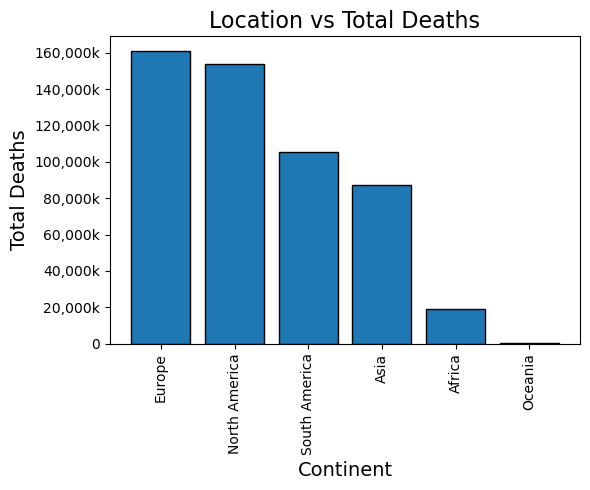

In [63]:
import matplotlib.ticker as ticker

# Sort the data by total_deaths in descending order
table1_sorted = table1.sort_values(by='total_deaths', ascending=False)

# Plotting with each bar having a different color
colors = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4']

# Plotting the bar chart with sorted data and specified colors
plt.figure(figsize=(6, 5))  # Set the figure size
plt.bar(table1_sorted['location'], table1_sorted['total_deaths'], color=colors[:len(table1_sorted)],edgecolor='black')  # Slice colors list if needed

# Adding title and labels
plt.title('Location vs Total Deaths', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

# Rotate x-axis labels for better readability if there are many locations
plt.xticks(rotation=90)
plt.ylim(0, 169000000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1000):,}k' if x >= 10000 else f'{int(x)}'))

# Display the chart
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


In [ ]:
# Europe has the highest total deaths, significantly surpassing other regions, suggesting it may have been heavily impacted by the COVID-19 pandemic.
# Americas also show a high count of total deaths, but still lower than Europe, indicating a significant but relatively lesser impact compared to Europe.
# Asia appears to have a moderate level of total deaths, which could suggest effective management or fewer cases compared to Europe and the Americas.
# Africa and Oceania show the lowest total deaths, indicating they were less affected by the pandemic compared to other regions.

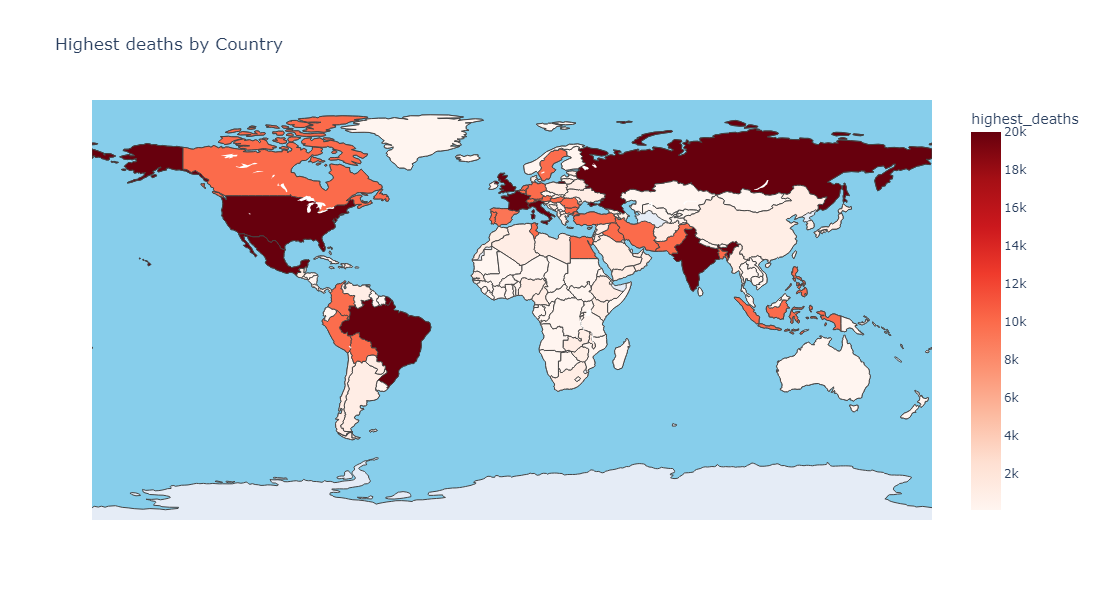

In [48]:
import pandas as pd
import plotly.express as px
#highest_deaths	percent_of_deaths_population

# Create DataFrame
df = pd.DataFrame(table4)


# Create the choropleth map
fig = px.choropleth(
    df,
    locations="location",
    locationmode="country names",
    color="highest_deaths",
    hover_name="location",
    hover_data=["population", "percent_of_deaths_population"],
    title="Highest deaths by Country",
    #color_continuous_scale=['blue', 'green', 'yellow', 'red'],
    # color_continuous_scale=px.colors.sequential.Plasma,
    #color_continuous_scale=['rgb(0,0,255)', 'rgb(0,255,0)', 'rgb(255,255,0)', 'rgb(255,0,0)'],
    color_continuous_scale=px.colors.sequential.Reds,
    range_color=(100,19999),
    projection="natural earth"
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        bgcolor='skyblue' 
    ),
    width=1000,
    height=600,
)

# Show the plot
fig.show()

# If you want to save the plot as an HTML file
fig.write_html("highest_deaths_map.html")

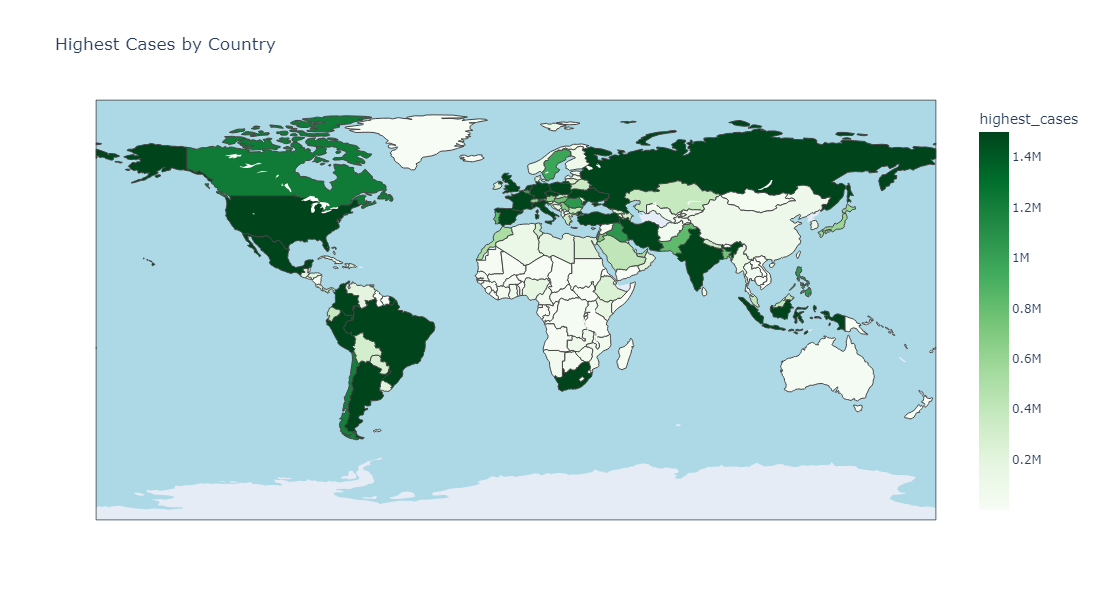

In [45]:
import pandas as pd
import plotly.express as px

# Create DataFrame
df = pd.DataFrame(table3)

# Create the choropleth map
fig = px.choropleth(
    df,
    locations="location",
    locationmode="country names",
    color="highest_cases",
    hover_name="location",
    hover_data=["population", "percent_of_infected_population"],
    title="Highest Cases by Country",
    color_continuous_scale=px.colors.sequential.Greens, 
    range_color=(1000, 1500000),
    projection="natural earth"
)

# Update layout for better appearance and change background to blue
fig.update_layout(
    geo=dict(
        showframe=True,
        showcoastlines=False,
        projection_type='equirectangular',
        bgcolor='lightblue' 
    ),
    width=1000,
    height=600,
    plot_bgcolor='blue',  # Map background
     # Entire plot background
)

# Show the plot
fig.show()

# If you want to save the plot as an HTML file
fig.write_html("highest_cases_map.html")
